In [1]:
# Import packages
import holoviews as hv
import hvplot.pandas

# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

import earthpy
import pandas as pd

In [2]:
# Download data notebook
Konza_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=PRCP'
    '&stations=USW00053974'
    '&startDate=2004-01-01'
    '&endDate=2024-12-31'
    '&units=standard')
Konza_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USW00053974&startDate=2004-01-01&endDate=2024-12-31&units=standard'

In [3]:
# Download the climate data
Konza_climate_df = pd.read_csv(
    Konza_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
Konza_climate_df.head()

,STATION,PRCP
DATE,,
2004-01-01,USW00053974,0.00
2004-01-02,USW00053974,0.00
2004-01-03,USW00053974,0.00
2004-01-04,USW00053974,0.03
2004-01-05,USW00053974,0.00


<Axes: title={'center': 'Precipitation at Konza Prarie Biological Station, KS'}, xlabel='Year', ylabel='Precipitation (in)'>

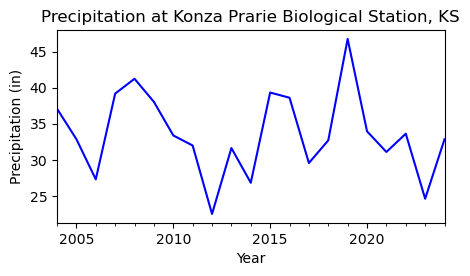

In [ ]:
# Plot precipitation over time
Konza_climate_df.PRCP.resample('YS').sum().plot(
    title='Precipitation at Konza Prairie Biological Station, KS',
    xlabel='Year',
    ylabel='Precipitation (in)',
    legend=False,
    color='blue',
    figsize=(5, 2.5))

In [ ]:
# Resample by year
Konza_ann_prcp_df = (
    Konza_climate_df[["PRCP"]]
    .resample('YS')
    .sum()
)
Konza_ann_prcp_df

,PRCP
DATE,
2004-01-01,37.10
2005-01-01,32.88
2006-01-01,27.32
2007-01-01,39.19
2008-01-01,41.25
2009-01-01,38.05
2010-01-01,33.40
2011-01-01,32.00
2012-01-01,22.52


In [6]:
#### This code prepared with the help of ChatGPT ####
# Remove rows with missing values
Konza_clean_df = Konza_ann_prcp_df.dropna(subset=['PRCP'])

# Getting data in the correct format for scikit-learn
X = (
    Konza_clean_df
    # Pull out the year from the date
    .index.year
    # Getting values as arrays using .values
    .values
    # Reshape 'Year' column to be a 2D array for scikit-learn
    .reshape(-1, 1))
y = Konza_clean_df['PRCP'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: -0.12048051948051956
Intercept: 276.24014718614734


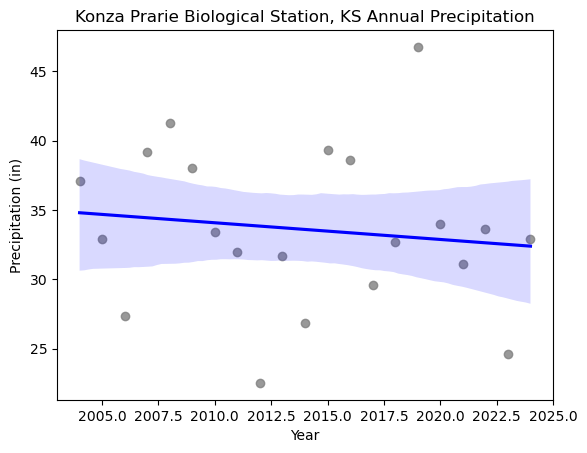

In [ ]:
# Plot annual average temperature with a trend line
ax = sns.regplot(
    x=Konza_ann_prcp_df.index.year, 
    y=Konza_ann_prcp_df.PRCP,
    # change color (These two lines of code produced with the help of ChatGPT)
    line_kws={"color": "blue"},
    scatter_kws={"color": "gray"}
)
# Set plot labels
ax.set(
    title='Konza Prairie Biological Station, KS Annual Precipitation',
    xlabel='Year',
    ylabel='Precipitation (in)'
)
# Save the plot as an image to embed in portfolio
# This line of code produced with the help of ChatGPT
plt.savefig("Konza_precip.png", bbox_inches="tight", dpi=300)

# Display the plot without extra text
plt.show()

This precipitation data was taken by the NOAA NCEI, and more specifically at station USW00053974 in Manhattan, KS. The data was collected daily at this land-based station and was summed to represent total precipitation values for each year between 2004 (when data collection at this station began) and 2024.

Citation: Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. MANHATTAN 6 SSW, KS US station USW00053974 Precipitation Data. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ Accessed Dec. 1, 2025.

Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.